criterion{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error” : 
    The function to measure the quality of a split. Supported criteria are “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

splitter{“best”, “random”}, default=”best” : 
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth int, default=None :
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split int or float, default=2 : 
    The minimum number of samples required to split an internal node:
    If int, then consider min_samples_split as the minimum number.
    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leafint or float, default=1 : 
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    If int, then consider min_samples_leaf as the minimum number.
    If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

min_weight_fraction_leaffloat, default=0.0 : 
    The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None : 
    The number of features to consider when looking for the best split:
    If int, then consider max_features features at each split.
    If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
    If “auto”, then max_features=n_features.
    If “sqrt”, then max_features=sqrt(n_features).
    If “log2”, then max_features=log2(n_features).
    If None, then max_features=n_features.

random_stateint, RandomState instance or None, default=None : 
    Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

max_leaf_nodesint, default=None : 
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

min_impurity_decreasefloat, default=0.0 : 
    A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
   
ccp_alphanon-negative float, default=0.0 : 
    Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Carseats.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


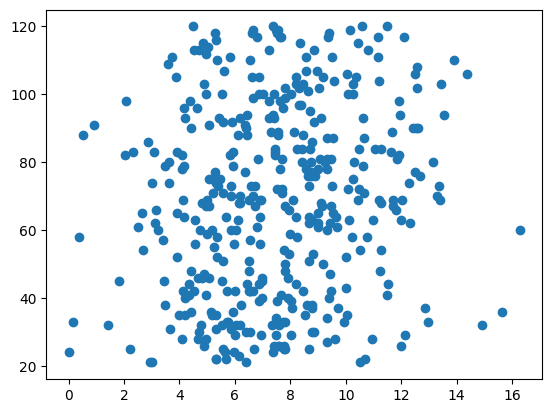

In [5]:
plt.scatter(df['Sales'],df['Income'])

In [6]:
from pandas_visual_analysis import VisualAnalysis

In [7]:
VisualAnalysis(df)

In [8]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [45]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,0,0
2,10.06,113,35,10,269,80,2,59,12,0,0
3,7.40,117,100,4,466,97,2,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1


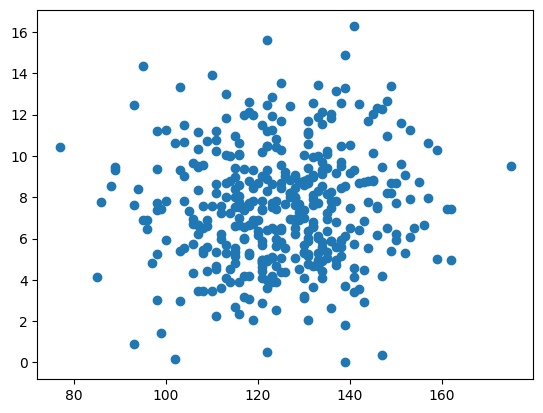

In [47]:
plt.scatter(x=df['CompPrice'],y=df['Sales'])

## Feature Engineering

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [11]:
dict = { 'Bad' : 0 , 'Good' :1,'Medium' :2}

df['ShelveLoc'] = df['ShelveLoc'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [12]:
df.Urban.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
dict = { 'Yes' : 0 , 'No' :1}

df['Urban'] = df['Urban'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,Yes
1,11.22,111,48,16,260,83,1,65,10,0,Yes
2,10.06,113,35,10,269,80,2,59,12,0,Yes
3,7.40,117,100,4,466,97,2,55,14,0,Yes
4,4.15,141,64,3,340,128,0,38,13,0,No


In [14]:
df.US.unique()

array(['Yes', 'No'], dtype=object)

In [15]:
dict = { 'Yes' : 0 , 'No' :1}

df['US'] = df['US'].map(dict)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,0,0
1,11.22,111,48,16,260,83,1,65,10,0,0
2,10.06,113,35,10,269,80,2,59,12,0,0
3,7.40,117,100,4,466,97,2,55,14,0,0
4,4.15,141,64,3,340,128,0,38,13,0,1


<Figure size 1200x1200 with 0 Axes>

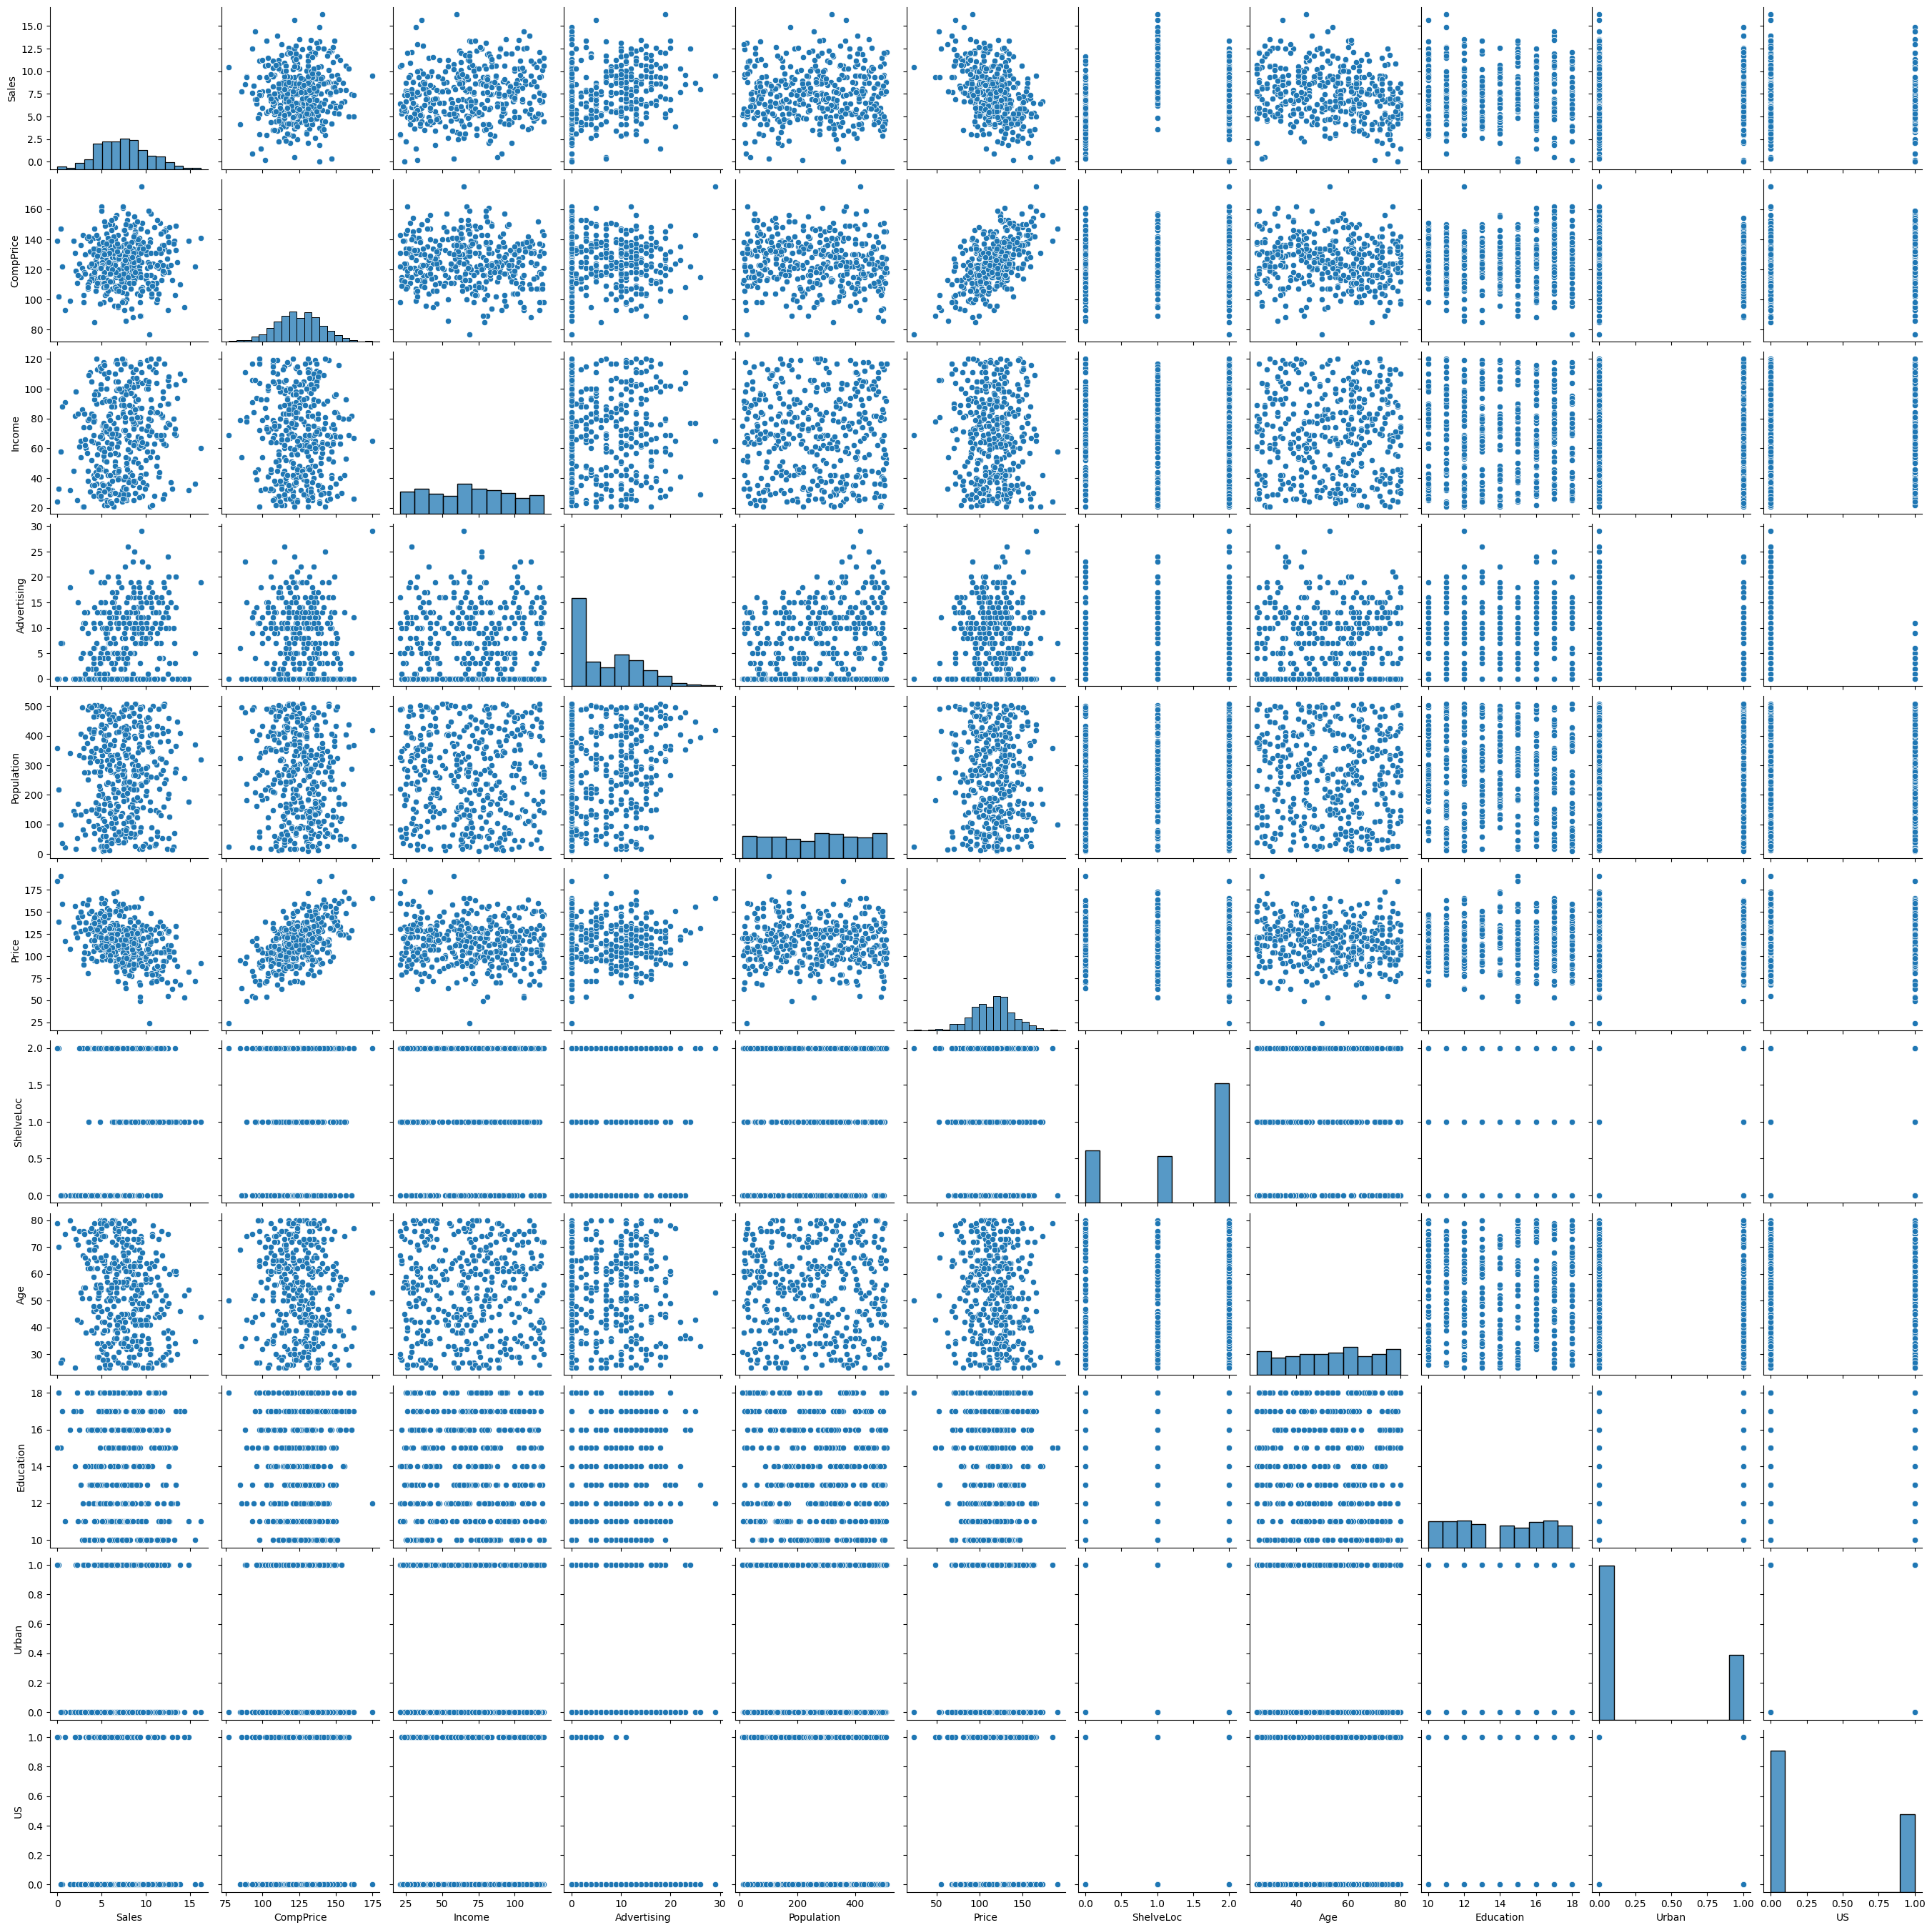

In [50]:
plt.figure(figsize=(12,12))
sns.pairplot(df)

## Spliting data

In [16]:
x = df.drop(['Sales'],axis=1)
y= df['Sales']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [19]:
x_train.shape

(320, 10)

In [20]:
y_train.shape

(320,)

In [21]:
x_test.shape

(80, 10)

In [22]:
y_test.shape

(80,)

## Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

**without ccp_alpha**

In [24]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(r2_score(pred,y_test))

0.2781171173134478


**without ccp_alpha=2**

In [25]:
dtree = DecisionTreeRegressor(ccp_alpha = 2)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(r2_score(pred,y_test))

0.0


**without ccp_alpha=0.1**

In [26]:
dtree = DecisionTreeRegressor(ccp_alpha = 0.1)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(r2_score(pred,y_test))

0.07517319784325738


In [27]:
print(dtree.feature_importances_)
print(dtree.max_features_)
print(dtree.n_features_in_)
print(dtree.feature_names_in_)
print(dtree.n_outputs_)
print(dtree.tree_)

[0.01902184 0.         0.13410472 0.         0.36366731 0.39129469
 0.09191144 0.         0.         0.        ]
10
10
['CompPrice' 'Income' 'Advertising' 'Population' 'Price' 'ShelveLoc' 'Age'
 'Education' 'Urban' 'US']
1


**last and last second feature are not much important so you can remove it**

In [28]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1


In [56]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

**training model without last and last second columns**

In [29]:
x = df.drop(['Sales','Urban','US'],axis=1)
y= df['Sales']

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [31]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(r2_score(pred,y_test))

0.30412408617407427


## Applying Decision Tree using GridSearchCV

**parameters**

In [32]:
params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best','random'] ,
    'max_depth' : [3,7,10,13,15,17],
    'max_features' : ['auto','log2',None],
    'ccp_alpha' :[0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5]
}

In [40]:
dtree = DecisionTreeRegressor()
gs_dtree = GridSearchCV(dtree , params , verbose =3,scoring = 'r2',cv=5)

In [41]:
gs_dtree.fit(x_train , y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV 1/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=0.131 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=0.119 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=0.169 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=0.331 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=0.123 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=0.145 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=0.383 total time= 

[CV 5/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=auto, splitter=random;, score=0.349 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.137 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.483 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.189 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.080 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.079 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=squared_error, max_depth=13, max_features=log2, splitter=random;, score=-0.278 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=squared_

[CV 2/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=random;, score=0.287 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=random;, score=0.230 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=random;, score=0.216 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=random;, score=0.341 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=best;, score=-0.005 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=best;, score=0.035 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=best;, score=0.006 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_de

[CV 5/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=log2, splitter=random;, score=0.007 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=best;, score=0.260 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=best;, score=0.185 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=best;, score=0.060 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=best;, score=0.180 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=best;, score=0.202 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_depth=13, max_features=None, splitter=random;, score=0.133 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=friedman_mse, max_

[CV 4/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=0.281 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=0.126 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.211 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.340 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.330 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.131 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.086 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=absol

[CV 2/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=log2, splitter=random;, score=-0.365 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=log2, splitter=random;, score=0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=log2, splitter=random;, score=0.204 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=log2, splitter=random;, score=0.267 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=-0.410 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=0.037 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=-0.086 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criteri

[CV 4/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=0.128 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=0.301 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto, splitter=best;, score=-0.097 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto, splitter=best;, score=-0.104 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto, splitter=best;, score=-0.020 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto, splitter=best;, score=0.018 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto, splitter=best;, score=-0.028 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=3, max_features=auto,

[CV 2/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.108 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.021 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=0.213 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.787 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.439 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.223 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, criterion=poisson, max_depth=13, max_features=log2, spli

[CV 4/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.135 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.142 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=0.278 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=-0.135 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=0.280 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=-0.197 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=0.261 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=sq

[CV 1/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.247 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=-0.360 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.187 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.251 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.413 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=15, max_features=auto, splitter=best;, score=0.344 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=squared_error, max_depth=15, max_features=auto, splitter=best;, score=0.271 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criter

[CV 2/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=auto, splitter=random;, score=0.284 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=auto, splitter=random;, score=-0.012 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=auto, splitter=random;, score=0.329 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=auto, splitter=random;, score=0.437 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=best;, score=0.227 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=best;, score=0.035 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=best;, score=0.193 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=friedman_mse

[CV 4/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.035 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=0.362 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=0.356 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=0.338 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=0.234 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=0.246 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=friedman_

[CV 1/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.113 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.058 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.066 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.271 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.190 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=random;, score=0.356 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=7, max_features=log2, splitter=random;, score=0.280 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=ab

[CV 4/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=-0.035 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=0.145 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.235 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.026 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.063 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.396 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.411 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, cri

[CV 2/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=-0.304 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=0.247 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=0.034 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=-0.091 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=-0.373 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=-0.038 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=0.050 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=7, max_features=auto, spl

[CV 5/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=auto, splitter=random;, score=-0.069 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=best;, score=-0.727 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=best;, score=-0.551 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=best;, score=-0.188 total time=   0.0s
[CV 4/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=best;, score=-0.073 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=best;, score=-0.112 total time=   0.0s
[CV 1/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.725 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0001, criterion=poisson, max_depth=15, max_features=lo

[CV 2/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=7, max_features=None, splitter=random;, score=0.069 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=7, max_features=None, splitter=random;, score=0.161 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=7, max_features=None, splitter=random;, score=0.127 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=7, max_features=None, splitter=random;, score=0.284 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=10, max_features=auto, splitter=best;, score=0.311 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=10, max_features=auto, splitter=best;, score=0.270 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=10, max_features=auto, splitter=best;, score=0.020 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=squared_err

[CV 5/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=auto, splitter=random;, score=0.203 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.390 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.295 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.089 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.143 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.416 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=squared_error, max_depth=17, max_features=log2, splitter=random;, score=-0.755 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=squared_

[CV 2/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=best;, score=0.234 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=best;, score=0.059 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=best;, score=0.350 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=best;, score=0.249 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=-0.046 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=0.420 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=0.145 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=friedman_mse, m

[CV 3/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=0.088 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=0.281 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=0.126 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.304 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.382 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.361 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=0.277 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=absolut

[CV 5/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=0.368 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.268 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.152 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.385 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.263 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.332 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=absolute_error, max_depth=13, max_features=log2, splitter=best;, score=-0.408 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criteri

[CV 3/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=0.069 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=-0.119 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=0.002 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.103 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.076 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=0.150 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=0.018 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=poisson, max_depth=3, max_features=log2, splitter=best;

[CV 4/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.050 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.078 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.574 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.545 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=0.062 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=0.215 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=0.111 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=poisson, max_depth=10, max_features=None, s

[CV 1/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.319 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.126 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.281 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.003 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=best;, score=0.149 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=-0.082 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=3, max_features=log2, splitter=random;, score=0.023 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=

[CV 4/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=auto, splitter=random;, score=0.375 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=auto, splitter=random;, score=0.286 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.002 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.061 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.171 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.054 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=0.419 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=squared_error, max

[CV 3/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=0.417 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=0.200 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=0.132 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=0.131 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=0.119 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=0.169 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=0.331 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=3

[CV 2/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=0.342 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=0.128 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=0.347 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=0.269 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=0.184 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=0.152 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=0.305 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=

[CV 2/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=0.330 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=0.235 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=0.025 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=0.302 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=0.129 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=0.292 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=0.004 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=friedman_mse, max_dept

[CV 3/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=auto, splitter=random;, score=0.229 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=auto, splitter=random;, score=0.311 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=auto, splitter=random;, score=0.402 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.049 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.371 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.182 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=0.008 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=absolute_error, m

[CV 5/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=0.353 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.199 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.105 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.016 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.461 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=0.400 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=absolute_error, max_depth=15, max_features=auto, splitter=random;, score=0.037 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=absolute_e

[CV 4/5] END ccp_alpha=0.01, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=0.017 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=3, max_features=None, splitter=random;, score=0.023 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=-0.233 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=0.153 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=0.035 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=best;, score=-0.008 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=poisson, max_depth=7, max_features=auto, splitter=random;, score=

[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=auto, splitter=random;, score=0.080 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.161 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.009 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=0.153 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=poisson, max_depth=13, max_features=log2, splitter=rando

[CV 4/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=best;, score=0.035 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=best;, score=-0.008 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=0.065 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.182 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=0.157 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=0.226 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=0.037 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=3, max_features=auto, splitte

[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, splitter=random;, score=0.266 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=best;, score=0.169 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=best;, score=0.104 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=best;, score=0.199 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=best;, score=0.449 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=best;, score=0.161 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=None, splitter=random;, score=0.232 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10

[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=auto, splitter=random;, score=0.414 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=auto, splitter=random;, score=0.418 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=auto, splitter=random;, score=0.388 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=auto, splitter=random;, score=0.398 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.171 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.429 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=0.118 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_dept

[CV 3/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=random;, score=-0.057 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=random;, score=0.377 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=log2, splitter=random;, score=0.144 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=None, splitter=best;, score=0.169 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=None, splitter=best;, score=0.104 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=None, splitter=best;, score=0.199 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_features=None, splitter=best;, score=0.449 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=7, max_feature

[CV 3/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=best;, score=0.199 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=best;, score=0.449 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=best;, score=0.161 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=random;, score=0.354 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=random;, score=0.427 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=random;, score=0.117 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, max_features=auto, splitter=random;, score=0.293 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=friedman_mse, max_depth=15, ma

[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=best;, score=0.143 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=best;, score=0.220 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=best;, score=0.068 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=3, max_features=log2, splitter=random;, score=0.037 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_de

[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=0.138 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=0.077 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.148 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.406 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.235 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.143 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=0.154 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error

[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=0.243 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=0.201 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=0.138 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=0.077 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=0.148 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=0.406 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=0.235 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, ma

[CV 1/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=poisson, max_depth=10, max_features=log2, splitter=best;

[CV 4/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=poisson, max_depth=15, max_features=None, splitter=random;, sc

[CV 3/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=0.130 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=0.080 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=log2, splitter=best;, score=0.091 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=squared_error, max_depth=7, max_features=log2

[CV 4/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=best;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=best;, score=0.080 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.130 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=squared_error, max_depth=13, max_features=None, splitter=random;, score=0.080 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=squared_error, max_depth=15, max_f

[CV 4/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=best;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=best;, score=0.080 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=3, max_features=None, 

[CV 1/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=0.130 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features=log2, splitter=best;, score=0.117 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=13, max_features

[CV 1/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=17, max_features=None, splitter=random;, score=0.208 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=17, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=17, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=17, max_features=None, splitter=random;, score=0.057 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=friedman_mse, max_depth=17, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=absolute_error, max_depth=3, max_features=auto, splitter=best;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=absolute_error, max_depth=3, max_features=auto, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=absolute_error, max_depth=3, max_feat

[CV 3/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=absolute_error, max_depth

[CV 5/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=log2, splitter=random;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17, max_features=None, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=absolute_error, max_depth=17,

[CV 4/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.070 t

[CV 2/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=1, criterion=poisson, max_depth=15, max_features=None, splitter=best;, score=-0.042 tot

[CV 4/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=squared_error, max_depth=7, max_featu

[CV 3/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=squared_error, max_depth=13, max

[CV 3/5] END ccp_alpha=2, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=3, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=3, max_features=au

[CV 3/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=10, max_feature

[CV 2/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=friedman_mse, max_depth=17, max_feature

[CV 5/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=auto, splitter=random;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_features=log2, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=absolute_error, max_depth=7, max_fea

[CV 3/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=absolute_error, max_depth=15, max_features=auto, splitter=random;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=absolute_error, max_depth

[CV 5/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=poisson, max_depth=7, max_features=log2, splitter=random;, score=-0.040 total time=  

[CV 3/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=2, criterion=poisson, max_depth=13, max_features=None, splitter=random;, score=-0.000 t

[CV 5/5] END ccp_alpha=2, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=3, max_features=auto, s

[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=10, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=squared_error, max_depth=10, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=squared_error, max_depth=10, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=squared_error, max_depth=10, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=squared_error, max_depth=13, max_features=auto, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=13, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=squared_error, max_depth=13, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=squared_error, max_depth=13, max

[CV 1/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=squared_error, max_depth=17, max_fea

[CV 3/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=7, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=7, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=7, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=10, max_features=aut

[CV 1/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=friedman_mse, max_depth=15, max_featu

[CV 3/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=absolute_error, max_depth=3, max

[CV 2/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=absolute_error, max_depth=13, max_features=auto, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=absolute_error, max_depth=1

[CV 2/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=poisson, max_depth=3, max_features=log2, splitter=best;, score=-0.042 total time=

[CV 5/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=3, criterion=poisson, max_depth=10, max_features=None, splitter=best;, score=-0.040 t

[CV 3/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=squared_error, max_depth=3, max_feature

[CV 4/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=squared_error, max_depth=13, max_fea

[CV 1/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=squared_error, max_depth=17, max_fea

[CV 1/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=10, max_featu

[CV 5/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=15, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=friedman_mse, max_depth=17, max_features=au

[CV 1/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=best;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10, max_features=auto, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=absolute_error, max_depth=10,

[CV 1/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=best;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=best;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17, max_features=auto, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=absolute_error, max_depth=17,

[CV 3/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=auto, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=4, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.000 total

[CV 1/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=squared_error, max_depth=7, max_featu

[CV 4/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=squared_error, max_depth=17, max_features=None, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=3, max

[CV 3/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_features=auto, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=10, max_feature

[CV 1/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=friedman_mse, max_depth=15, max_features=lo

[CV 4/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=absolute_error, max_depth=3, max_features=None, splitter=random;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=absolute_error, max_depth=7, m

[CV 3/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=best;, score=-0.001 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=-0.060 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=-0.043 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=-0.029 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=absolute_error, max_depth=13, max_features=None, splitter=random;, score=-0.045 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=absolute_error, max_depth

[CV 1/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=log2, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=log2, splitter=random;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=None, splitter=best;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=None, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=3, max_features=None, splitter=best;, score=-0.036 total tim

[CV 2/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=poisson, max_depth=13, max_features=log2, splitter=random;, score=-0.042 tot

[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=best;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=best;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=best;, score=-0.000 total time=   0.0s
[CV 1/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.070 total time=   0.0s
[CV 2/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.040 total time=   0.0s
[CV 3/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.036 total time=   0.0s
[CV 4/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.042 total time=   0.0s
[CV 5/5] END ccp_alpha=5, criterion=poisson, max_depth=17, max_features=None, splitter=random;, score=-0.000 t

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3,
                                       4, 5],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 7, 10, 13, 15, 17],
                         'max_features': ['auto', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [42]:
print(gs_dtree.best_score_)

0.37773440712298845


In [44]:
print(gs_dtree.best_params_)

{'ccp_alpha': 0.1, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': None, 'splitter': 'random'}
